Analyse distillBERT word embeddings

In [10]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from transformers import AutoModelForSequenceClassification, TrainingArguments
from scipy.cluster.hierarchy import linkage, dendrogram
from transformers import AutoTokenizer
from scipy.spatial.distance import pdist
import random

In [40]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
vocab = tokenizer.get_vocab()
id_to_token = {v: k for k, v in vocab.items()}
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

word_tensor = model.distilbert.embeddings.word_embeddings.weight.to('cuda')
word_matrix = word_tensor.detach().to('cpu').numpy()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
# get a random sample of tokens
all_tokens = list(vocab.keys())
random.seed(0)
sample_tokens = random.sample(all_tokens, 1000)
E = word_matrix[[vocab[t] for t in sample_tokens]]
print (E.shape)

(1000, 768)


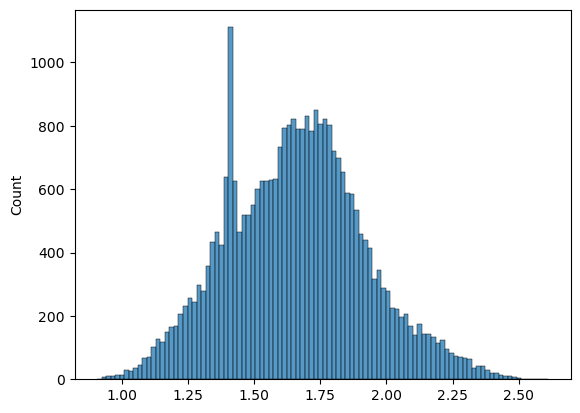

In [42]:
# plot histogram of norm
norms = torch.norm(word_tensor, dim=1).detach().to('cpu').numpy()
sns.histplot(norms, bins=100)
plt.show()

In [43]:
word_emb_norms = torch.norm(word_tensor, dim=1)
word_emb_normed = word_tensor / word_emb_norms[:, None]
cosine_sim = torch.mm(word_emb_normed, word_emb_normed.T)
# get top-k most similar words for each word based on cosine similarity
topk = 20
topk_similar = torch.topk(cosine_sim, topk, dim=1)

In [55]:
# show top-k most similar words for a few random words
for i in range(10):
    print (f"Most similar words to {sample_tokens[i]}:")
    token_id = vocab[sample_tokens[i]]
    for j in range(topk):
        similar_token_id = topk_similar.indices[token_id, j].item()
        cosine_similarity = topk_similar.values[token_id, j].item()
        similar_token = id_to_token[similar_token_id]
        print (f"\t{j+1}. {similar_token} ({cosine_similarity})")

Most similar words to attaining:
	1. attaining (1.0000008344650269)
	2. attained (0.8804657459259033)
	3. achieving (0.8618856072425842)
	4. obtaining (0.8354784250259399)
	5. regaining (0.8188596963882446)
	6. acquiring (0.7954796552658081)
	7. asserting (0.79477459192276)
	8. realising (0.7917030453681946)
	9. attain (0.7910211682319641)
	10. facilitating (0.7850756645202637)
	11. overcoming (0.7841115593910217)
	12. ᄐ (0.7796791195869446)
	13. possessing (0.7787010669708252)
	14. endeavors (0.7781158089637756)
	15. ##ذ (0.7773768305778503)
	16. surpassing (0.7767564654350281)
	17. yearning (0.7759528756141663)
	18. 46th (0.7757009863853455)
	19. 48th (0.775653600692749)
	20. seizing (0.7750647664070129)
Most similar words to practically:
	1. practically (1.0000003576278687)
	2. virtually (0.8417704105377197)
	3. basically (0.7539096474647522)
	4. essentially (0.7214288115501404)
	5. nearly (0.6940051317214966)
	6. theoretically (0.6894847750663757)
	7. absolutely (0.6857393980026245